In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import kpss, adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [240]:
from arch import arch_model
from arch.univariate import ARX
from arch.univariate import GARCH

In [348]:
df = pd.read_pickle('WheatExportData.pkl')
date = pd.to_datetime(df.index)
df['date'] = date
df = df.set_index('date')
df.iloc[425:450]

,Exports
date,
1998-01-08,460268
1998-01-15,534600
1998-01-22,572280
1998-01-29,705509
1998-02-05,474583
1998-02-12,476095
1998-02-19,464063
1998-02-26,420226
1998-03-05,329972


In [245]:
dti = pd.date_range(start = '1990-01-04',end = '2018-11-22',freq='W-THU')

In [246]:
v = np.zeros(1508)
df_sorted = pd.DataFrame(v,index = dti,columns = ['Exports'])
for i in range(len(dti)):
#     print(i)
    if len(df.loc[dti[i]])>1:
        df_sorted.loc[dti[i]]=((df.loc[dti[i]]).values)[0]
    else:
#         print(i)
#         print(df.loc[dti[i]].iloc[0])
        df_sorted.loc[dti[i]]= df.loc[dti[i]].iloc[0]
#         print(df_sorted.loc[dti[i]])
df_sorted

,Exports
1990-01-04,519188.0
1990-01-11,560467.0
1990-01-18,659829.0
1990-01-25,619135.0
1990-02-01,677870.0
...,...
2018-10-25,413756.0
2018-11-01,328433.0
2018-11-08,263003.0
2018-11-15,503848.0


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


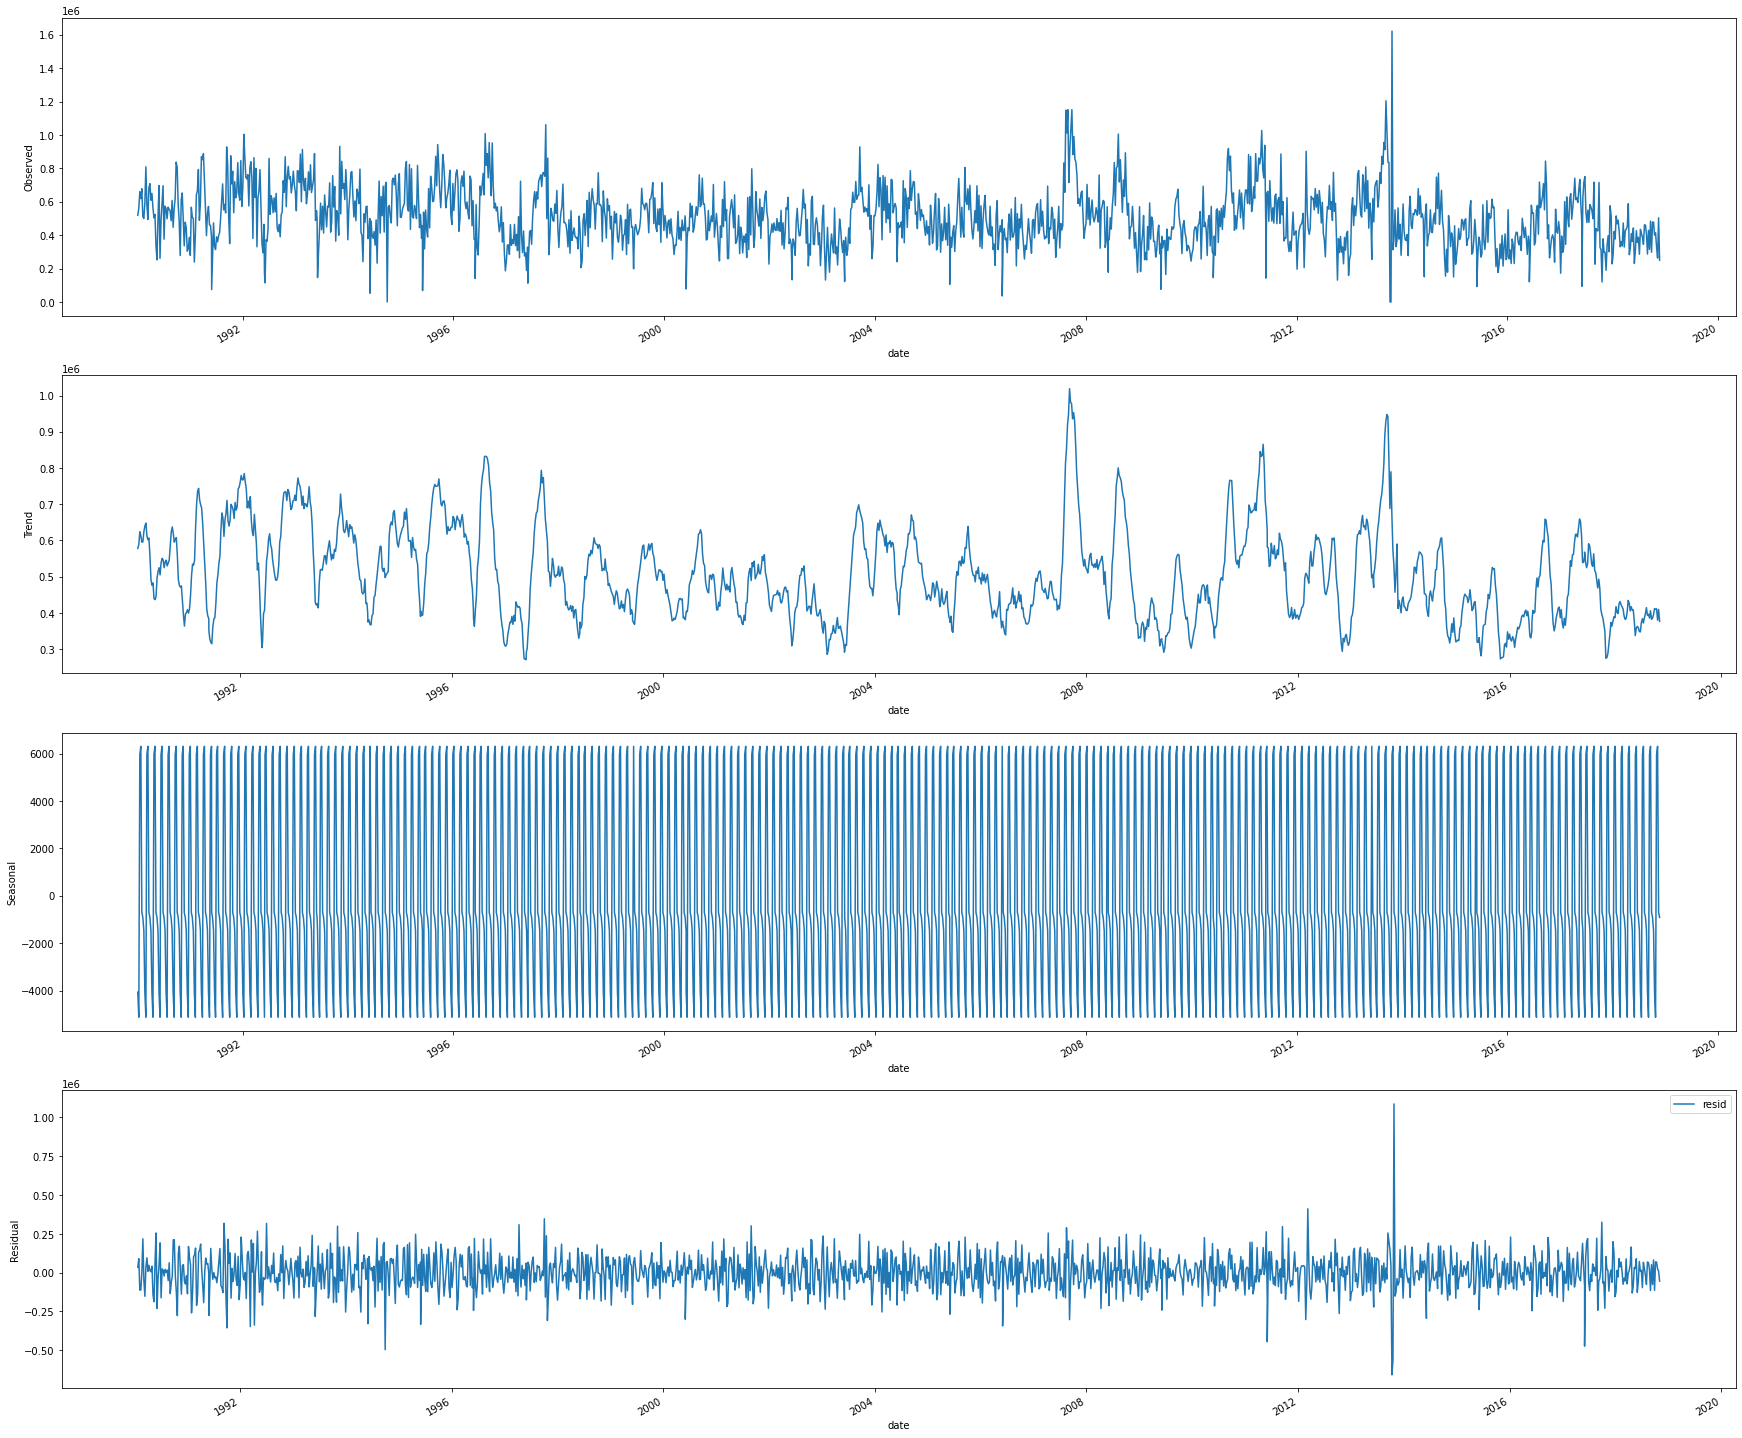

In [141]:
seasonal_result0 = seasonal_decompose(df,model='additive',freq=7)
fig,axes = plt.subplots(4,1,figsize=(30,28))
seasonal_result0.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
seasonal_result0.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
seasonal_result0.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
seasonal_result0.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.legend()
plt.show()

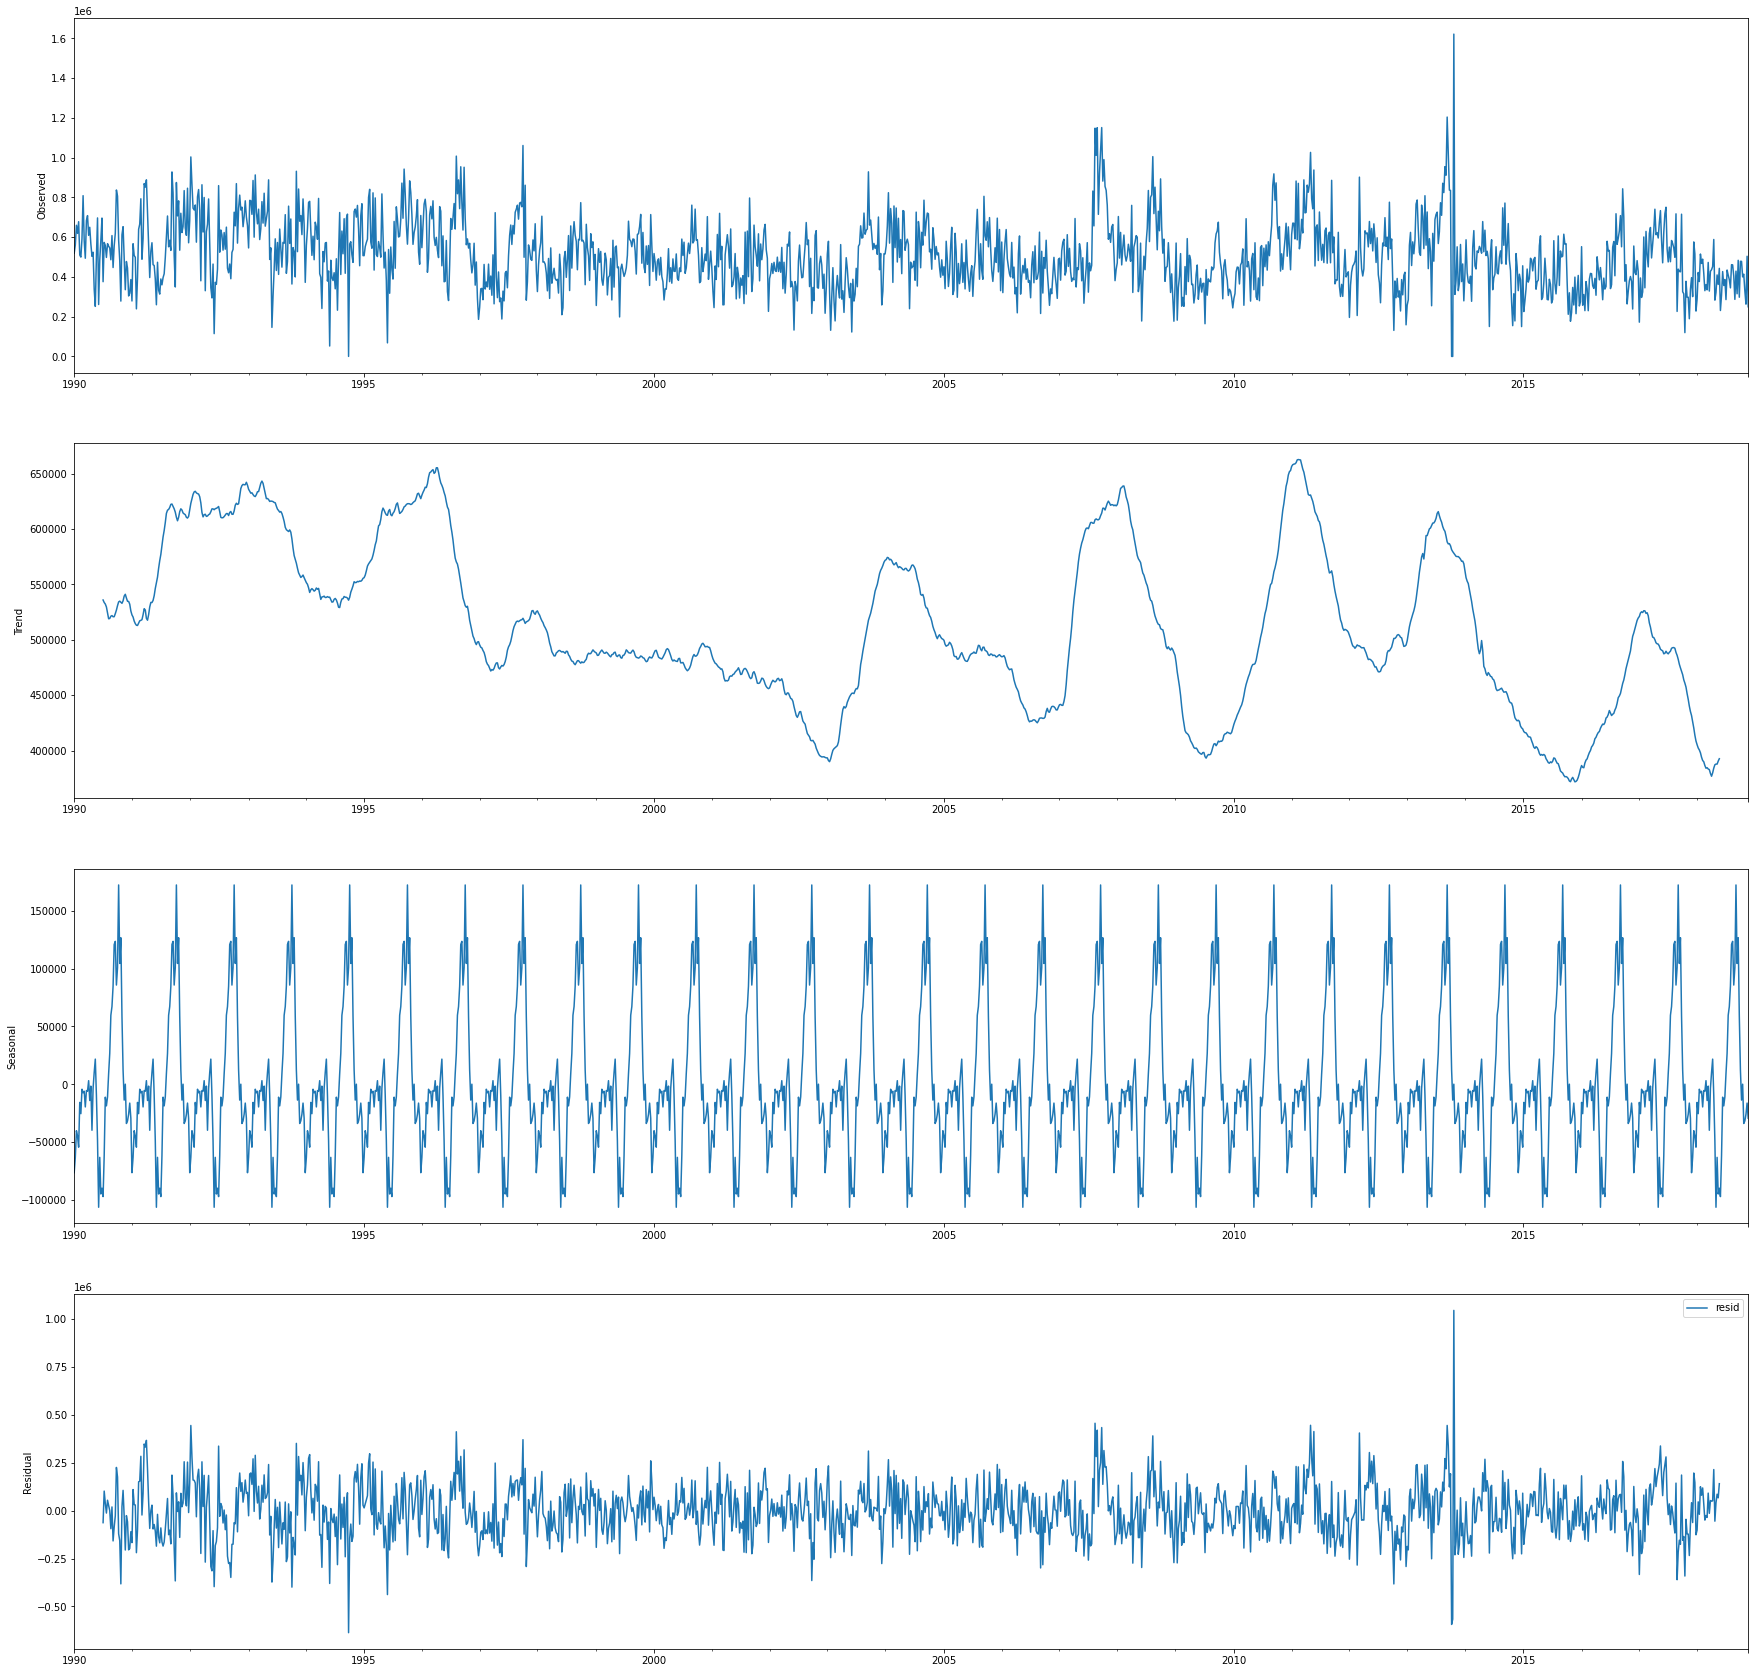

In [355]:
seasonal_result = seasonal_decompose(df_sorted,model='additive')
fig,axes = plt.subplots(4,1,figsize=(30,30))
seasonal_result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
seasonal_result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
seasonal_result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
seasonal_result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.legend()
plt.show()


In [399]:
trend = seasonal_result.trend.dropna()
seasonality = seasonal_result.seasonal.dropna()
resid = seasonal_result.resid.dropna()

In [364]:
seasonality[:110]

1990-01-04   -76348.559594
1990-01-11   -63028.735762
1990-01-18   -40081.531435
1990-01-25   -44703.538990
1990-02-01   -54285.064402
                  ...     
1992-01-09   -63028.735762
1992-01-16   -40081.531435
1992-01-23   -44703.538990
1992-01-30   -54285.064402
1992-02-06   -15616.993317
Freq: W-THU, Name: seasonal, Length: 110, dtype: float64

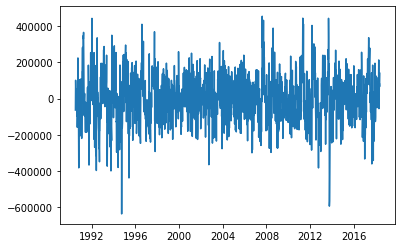

In [327]:
resid_r = resid.drop(resid.index[[1216]])
plt.plot(resid_r)

In [331]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import kpss, adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

def first_step(df,name):
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    plot_acf(df,ax=ax[0])
    ax[0].set_title(name+' ACF plot')
    
    num = len(df)
    maxLag = int(np.log(num))
    adf = adfuller(df,maxlag=maxLag)
    print('p value for ADF test: ',adf[1])
    kpss_ = kpss(df,lags=maxLag)
    print('p value for KPSS test: ',kpss_[1],'\n')
    print('statistics for KPSS: ',kpss_[0],' criteria: ',kpss_[-1])
    
    ljbox_test = acorr_ljungbox(df,maxLag)#package version
    
    ax[1].plot(ljbox_test[1])
    ax[1].axhline(y=0.05, color='r',ls='--')
    ax[1].set_title("LB test")
    ax[1].grid()
    
    plt.show()

In [341]:
import scipy.stats as stats
import statsmodels.api as sm
def plot_diagnosticsTight3(data):

    fig, (ax2,ax3,ax4,ax5) = plt.subplots(1,4,figsize=(30,5))
    
#     ax1.hist(data, bins =40,color='m', density = True)  
#     mu = data.mean()
#     sigma = data.std()
#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
#     ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
#     ax1.grid()
#     ax1.set_title("Hist Data")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Data")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    #logData = np.floor(np.log(len(data)))
    ljbox_test = sm.stats.acorr_ljungbox(data,10)#package version
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    ax5.set_title('QQ plot against std normal')
    
#     ax6.plot(data*data)
#     ax6.grid()
#     ax6.set_title("Data Sqr")
    
    plt.tight_layout()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


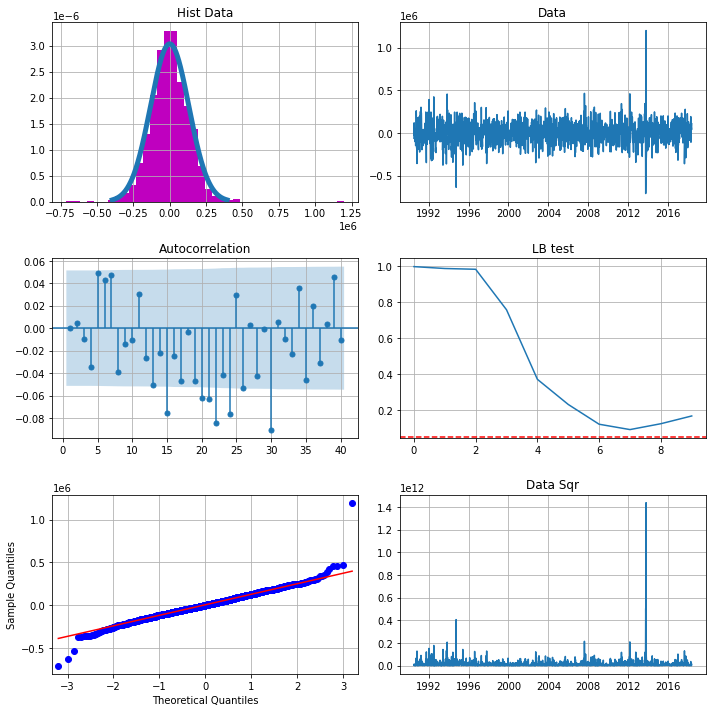

In [271]:
plot_diagnosticsTight3(model.resid)

p value for ADF test:  0.0006947766076071304
p value for KPSS test:  0.01 

statistics for KPSS:  3.6848438668384573  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


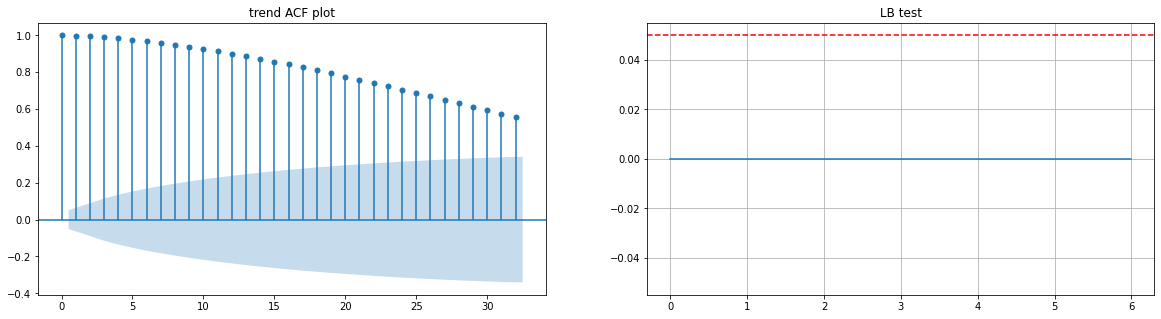

In [365]:
first_step(trend,'trend')

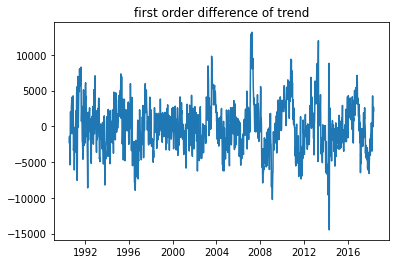

In [370]:
trend_diff = trend.diff().dropna()
plt.title('first order difference of trend')
plt.plot(trend_diff)

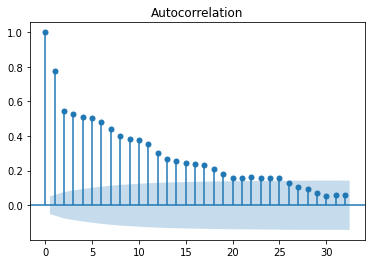

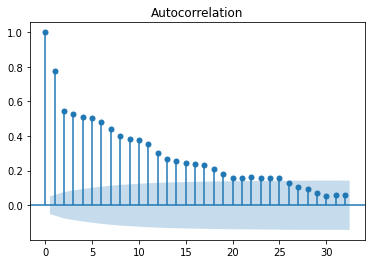

In [401]:
plot_acf(trend_diff)


p value for ADF test:  5.790330508494272e-10
p value for KPSS test:  0.1 

statistics for KPSS:  0.0815083315082213  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


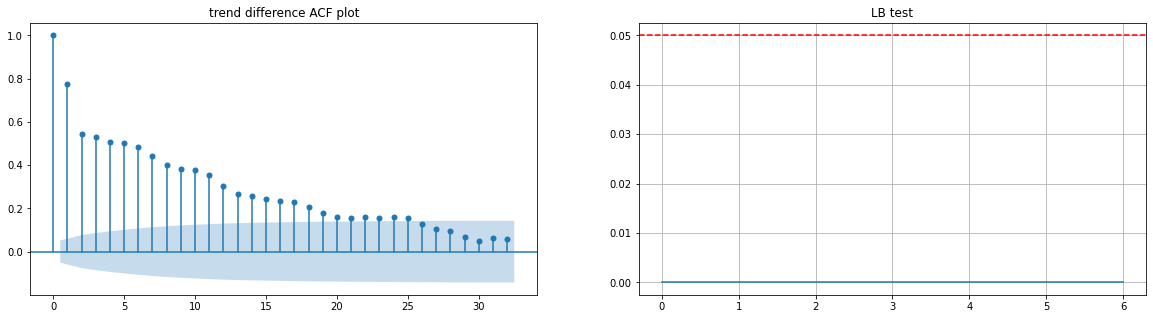

In [369]:
first_step(trend_diff,'trend difference')

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(2, 1, 2); AIC=25777.575, BIC=25809.272, Fit time=0.675 seconds
Fit ARIMA: order=(0, 1, 0); AIC=27707.917, BIC=27718.482, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=26382.973, BIC=26398.822, Fit time=0.016 seconds
Fit ARIMA: order=(0, 1, 1); AIC=26238.667, BIC=26254.516, Fit time=0.147 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(1, 1, 2); AIC=25777.600, BIC=25804.014, Fit time=0.521 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(3, 1, 2); AIC=25777.729, BIC=25814.708, Fit time=1.045 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(2, 1, 1); AIC=25906.451, BIC=25932.865, Fit time=0.535 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarn

Fit ARIMA: order=(2, 1, 3); AIC=25769.273, BIC=25806.253, Fit time=2.069 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(3, 1, 4); AIC=25775.398, BIC=25822.942, Fit time=2.353 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(1, 1, 3); AIC=25777.372, BIC=25809.069, Fit time=0.696 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(3, 1, 3); AIC=25775.254, BIC=25817.516, Fit time=1.146 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return

Fit ARIMA: order=(2, 1, 4); AIC=25775.299, BIC=25817.561, Fit time=1.166 seconds
Total fit time: 10.380 seconds
Selected order=  2 1 3


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.854e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1455
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -12877.637
Method:                       css-mle   S.D. of innovations           1681.332
Date:                Sun, 29 Nov 2020   AIC                          25769.273
Time:                        18:27:43   BIC                          25806.253
Sample:                             1   HQIC                         25783.071
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.4618    393.358     -0.250      0.802    -869.429     672.506
ar.L1.D.y     -0.0289      0.011     -2.725      0.006      -0.050      -0.008
ar.L2.D.y      0.9226      0.011     87.106      0.0

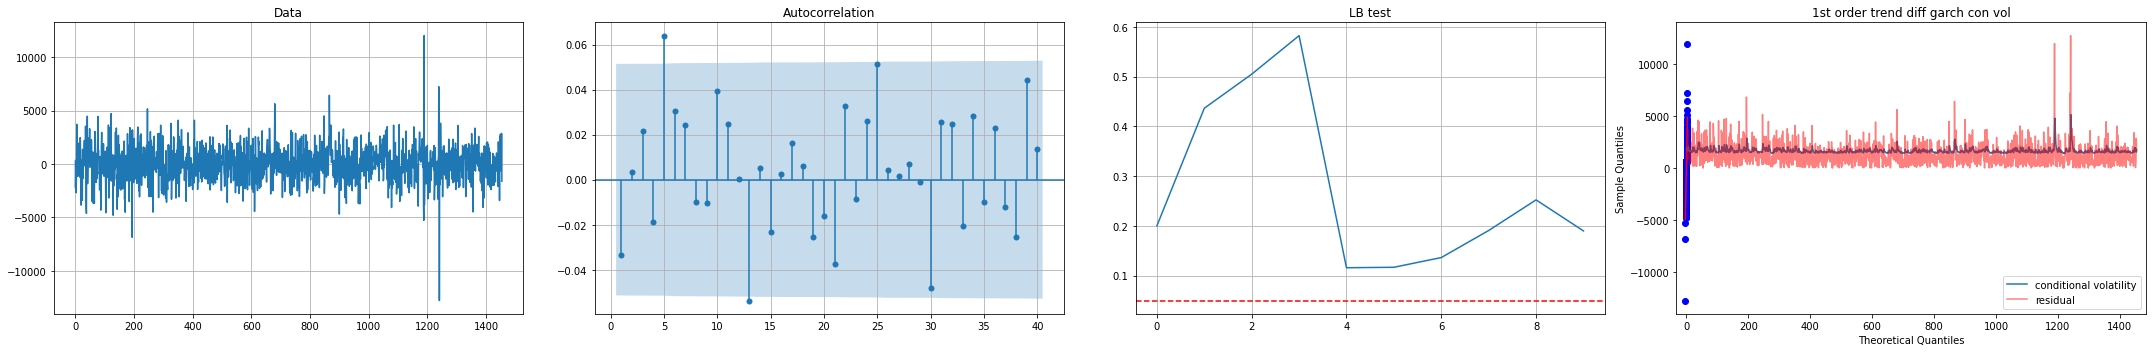

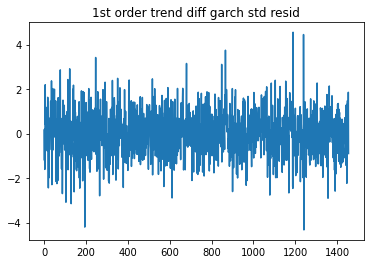

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


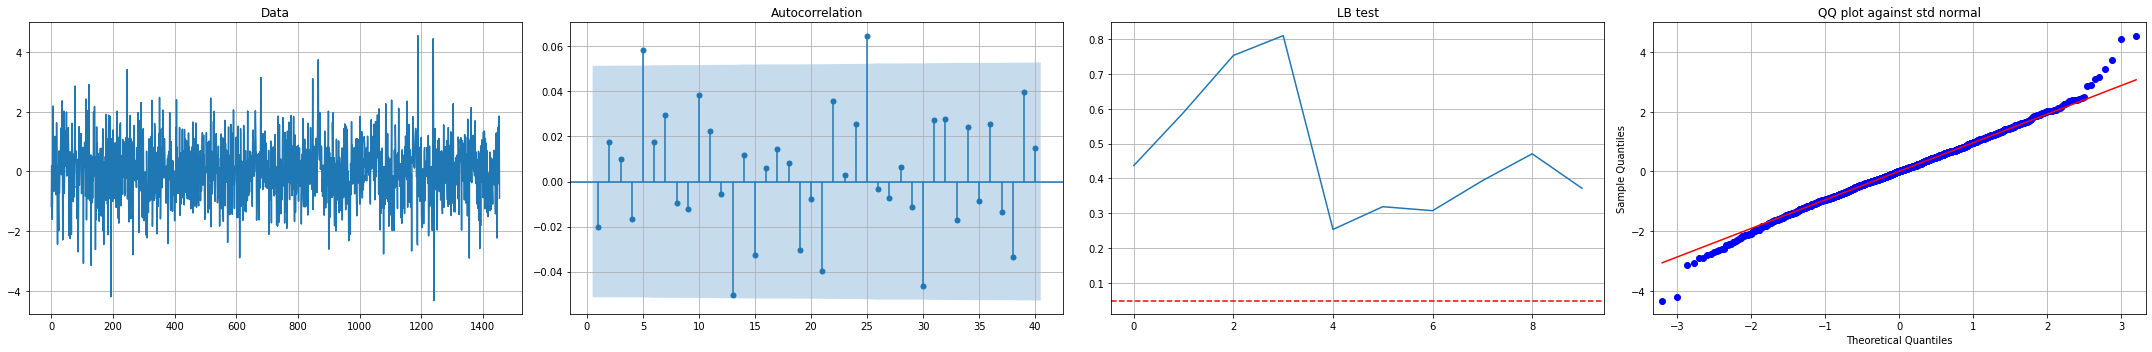

In [402]:
t_results = pm.auto_arima(trend,trace = True,seasonal=False, with_intercept=True) #d = 1
p, d, q = t_results.order
print('Selected order= ',p,d,q)

print(t_results.summary())

t_arima_resid = t_results.resid()
# plt.plot(t_arima_resid)
# plt.ylabel('arima model residual of 1st order trend diff')
# plt.show()

# first_step(t_arima_resid,'t_arima_resid')
plot_diagnosticsTight3(t_arima_resid)

t_model_garch = arch_model(t_arima_resid, vol='GARCH',p=1, q=1).fit()
print(t_model_garch.summary())

t_con_vol=t_model_garch.conditional_volatility

plt.figure(1, figsize=(8,4))
plt.plot(t_con_vol,label = 'conditional volatility')
plt.plot(abs(t_model_garch.resid), color = 'red', alpha = 0.5,label = 'residual')
plt.legend()
plt.title('1st order trend diff garch con vol')
plt.grid()
plt.show()

t_std_resid = t_model_garch.resid/t_con_vol
plt.plot(t_std_resid)
plt.title('1st order trend diff garch std resid')
plt.show()

plot_diagnosticsTight3(t_std_resid)

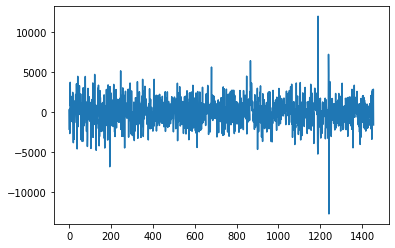

In [406]:
plt.plot(t_arima_resid)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


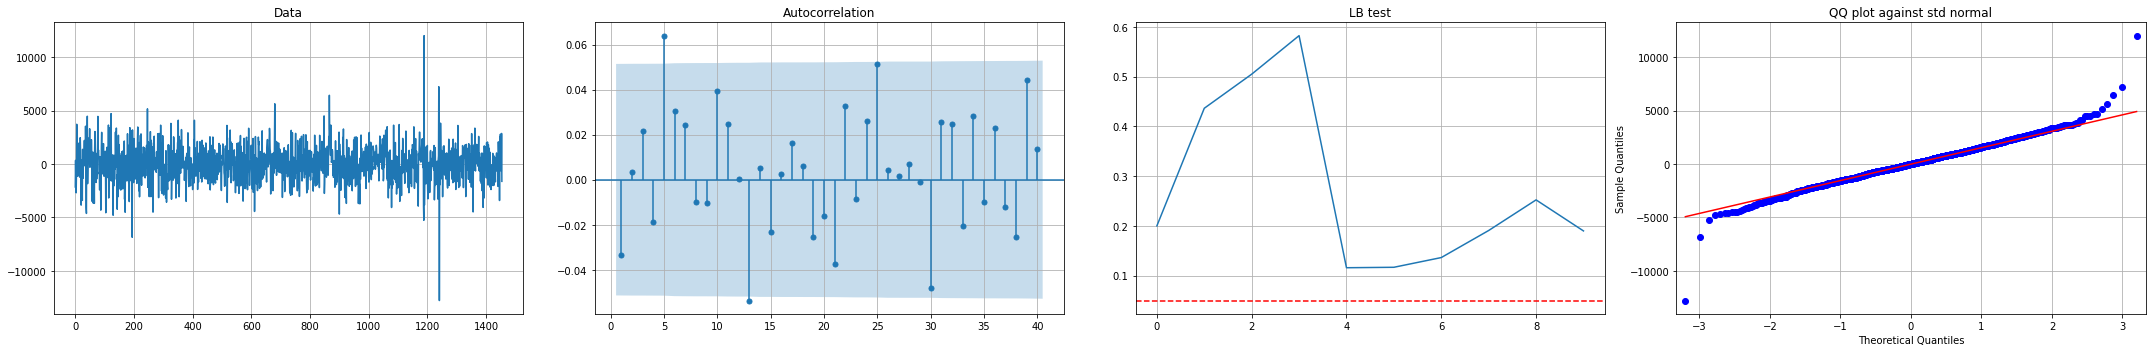

In [403]:
plot_diagnosticsTight3(t_arima_resid)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Fit ARIMA: order=(2, 0, 2); AIC=38467.271, BIC=38498.972, Fit time=0.193 seconds
Fit ARIMA: order=(0, 0, 0); AIC=38642.608, BIC=38653.175, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=38542.987, BIC=38558.837, Fit time=0.011 seconds
Fit ARIMA: order=(0, 0, 1); AIC=38572.470, BIC=38588.320, Fit time=0.013 seconds
Fit ARIMA: order=(1, 0, 2); AIC=38465.352, BIC=38491.769, Fit time=0.166 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(1, 0, 1); AIC=38466.478, BIC=38487.612, Fit time=0.139 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Fit ARIMA: order=(1, 0, 3); AIC=38467.288, BIC=38498.988, Fit time=0.237 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 2); AIC=38518.359, BIC=38539.492, Fit time=0.045 seconds
Total fit time: 0.862 seconds
Selected order=  1 0 2
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1456
Model:                     ARMA(1, 2)   Log Likelihood              -19227.676
Method:                       css-mle   S.D. of innovations         131506.666
Date:                Sun, 29 Nov 2020   AIC                          38465.352
Time:                        18:14:13   BIC                          38491.769
Sample:                             0   HQIC                         38475.208
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 3); 

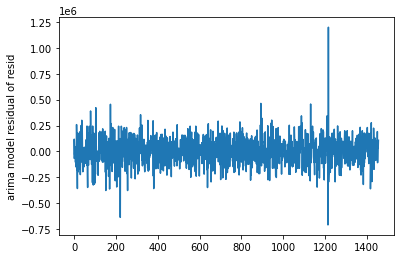

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.008163324438678262  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


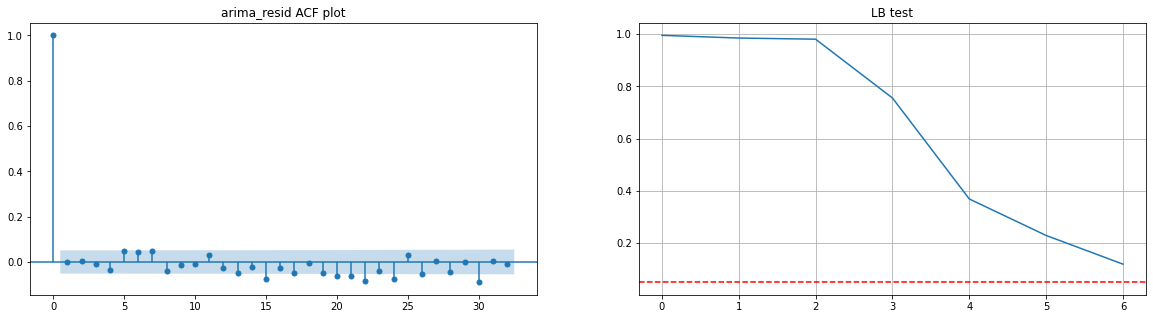

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.729e+10. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:      6,   Neg. LLF: 21453.992688013157
Iteration:      2,   Func. Count:     13,   Neg. LLF: 19253.66416017528
Iteration:      3,   Func. Count:     19,   Neg. LLF: 19183.154321769347
Iteration:      4,   Func. Count:     25,   Neg. LLF: 19183.113004877596
Iteration:      5,   Func. Count:     30,   Neg. LLF: 19183.11300168701
Iteration:      6,   Func. Count:     34,   Neg. LLF: 19183.11300168702
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19183.11300168701
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19183.1
Distribution:                  Normal   AI

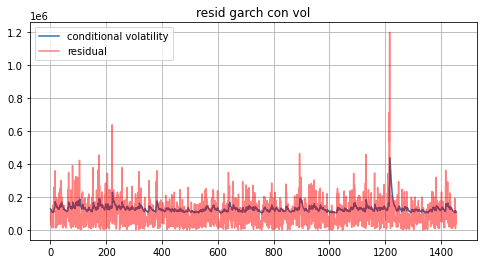

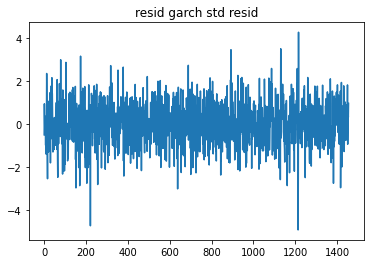

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


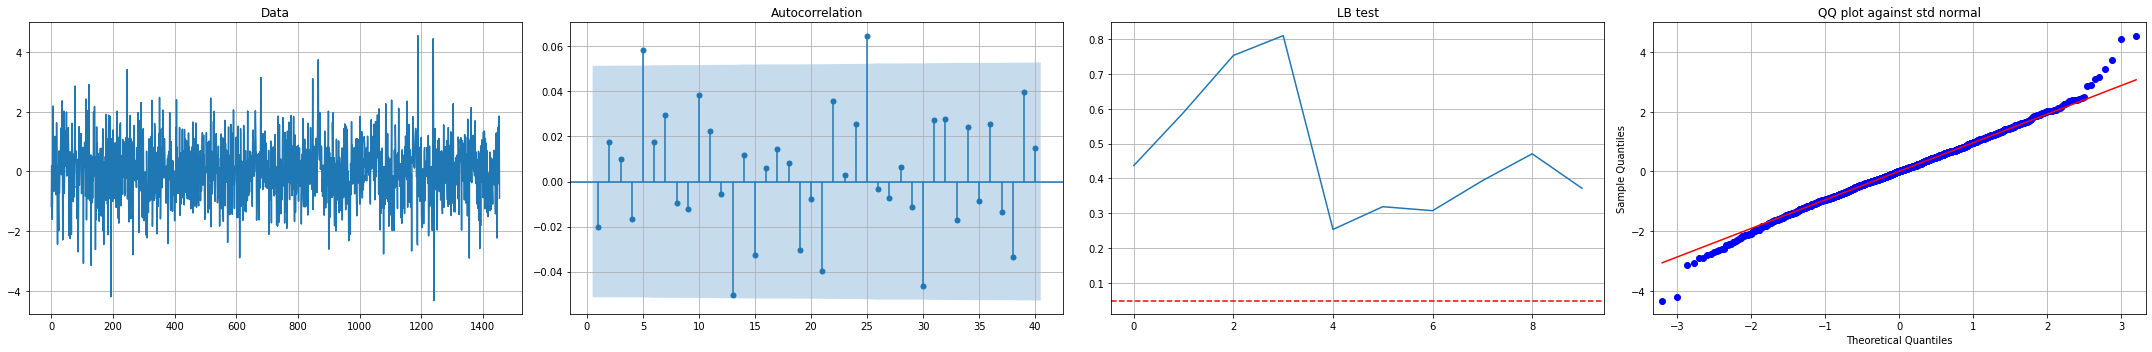

In [400]:
results = pm.auto_arima(resid,trace = True,seasonal=False, with_intercept=True) #d = 1
p, d, q = results.order
print('Selected order= ',p,d,q)

print(results.summary())

arima_resid = results.resid()
plt.plot(arima_resid)
plt.ylabel('arima model residual of resid')
plt.show()

first_step(arima_resid,'arima_resid')

model_garch = arch_model(arima_resid, vol='GARCH',p=1, q=1).fit()
print(model_garch.summary())

con_vol=model_garch.conditional_volatility

plt.figure(1, figsize=(8,4))
plt.plot(con_vol,label = 'conditional volatility')
plt.plot(abs(model_garch.resid), color = 'red', alpha = 0.5,label = 'residual')
plt.legend()
plt.title('resid garch con vol')
plt.grid()
plt.show()

std_resid = model_garch.resid/con_vol
plt.plot(std_resid)
plt.title('resid garch std resid')
plt.show()

plot_diagnosticsTight3(t_std_resid)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


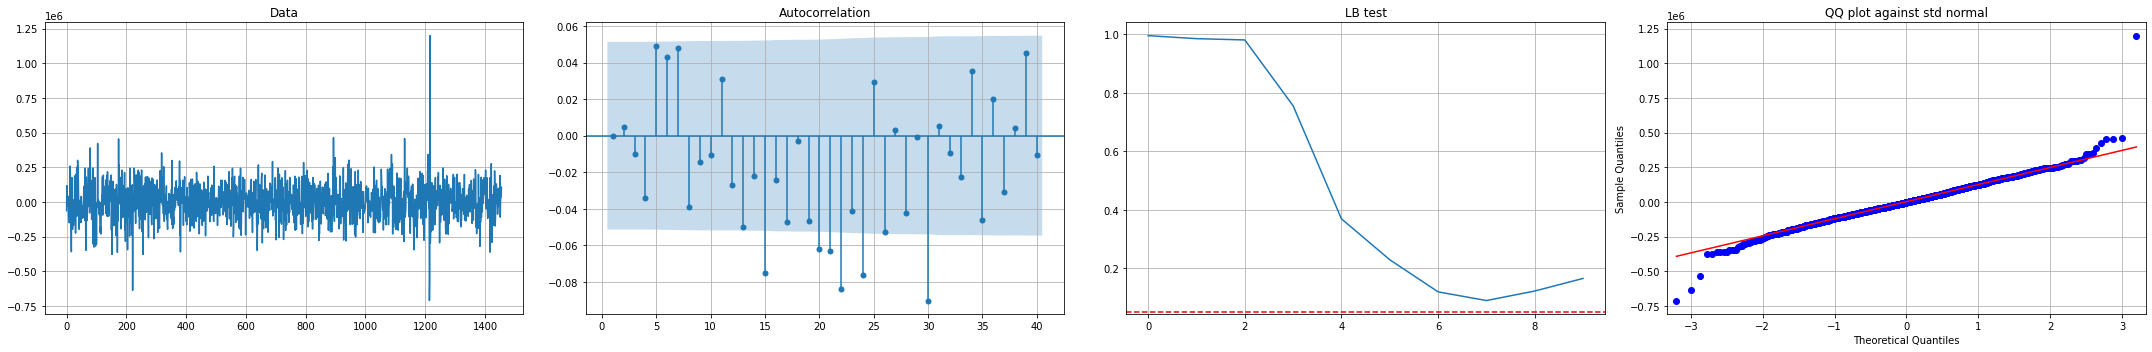

In [405]:
plot_diagnosticsTight3(arima_resid)

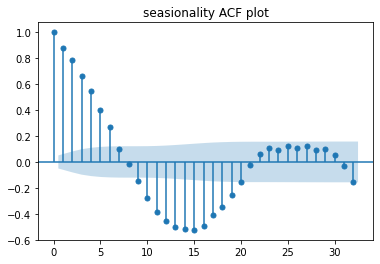

p value for ADF test:  4.24746347031528e-28
p value for KPSS test:  0.1 

statistics for KPSS:  0.00860186141103384  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [173]:
first_step(seasonality,'seasionality')

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


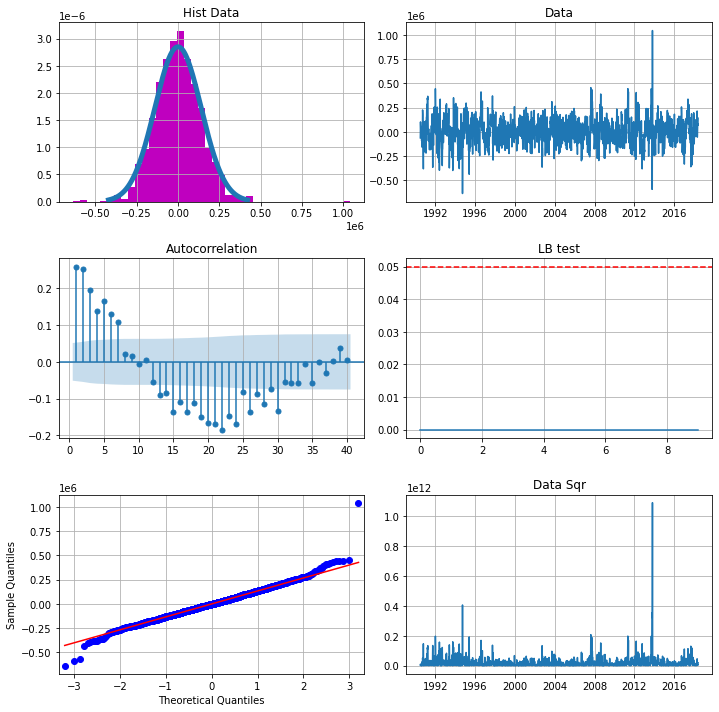

In [272]:
plot_diagnosticsTight3(resid)

p value for ADF test:  6.210853173790679e-19
p value for KPSS test:  0.1 

statistics for KPSS:  0.009419965817051925  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


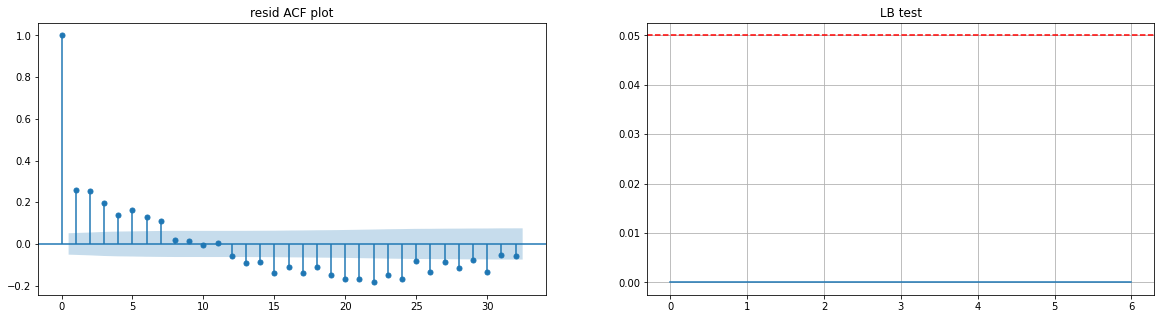

In [332]:
first_step(resid,'resid')

In [372]:
results = pm.auto_arima(resid,trace = True, d=0, seasonal=False, with_intercept=True) #d = 1
p, d, q = results.order
print('Selected order= ',p,d,q)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(2, 0, 2); AIC=38467.271, BIC=38498.972, Fit time=0.183 seconds
Fit ARIMA: order=(0, 0, 0); AIC=38642.608, BIC=38653.175, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=38542.987, BIC=38558.837, Fit time=0.011 seconds
Fit ARIMA: order=(0, 0, 1); AIC=38572.470, BIC=38588.320, Fit time=0.013 seconds
Fit ARIMA: order=(1, 0, 2); AIC=38465.352, BIC=38491.769, Fit time=0.161 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsm

Fit ARIMA: order=(1, 0, 1); AIC=38466.478, BIC=38487.612, Fit time=0.131 seconds


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Fit ARIMA: order=(1, 0, 3); AIC=38467.288, BIC=38498.988, Fit time=0.230 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 2); AIC=38518.359, BIC=38539.492, Fit time=0.044 seconds
Total fit time: 0.826 seconds
Selected order=  1 0 2


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 3); 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21453.99247223366
Iteration:      2,   Func. Count:     13,   Neg. LLF: 19253.663411641595
Iteration:      3,   Func. Count:     19,   Neg. LLF: 19183.15488687782
Iteration:      4,   Func. Count:     25,   Neg. LLF: 19183.11354743378
Iteration:      5,   Func. Count:     30,   Neg. LLF: 19183.11354421352
Iteration:      6,   Func. Count:     34,   Neg. LLF: 19183.11354421353
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19183.11354421352
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.729e+10. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19183.1
Distribution:                  Normal   AIC:                           38374.2
Method:            Maximum Likelihood   BIC:                           38395.4
                                        No. Observations:                 1456
Date:                Sun, Nov 29 2020   Df Residuals:                     1452
Time:                        17:55:21   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            86.3832   3291.082  2.625e-02      0.979 [-6.364e+03,6.537e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7295e+09  7.765e+08      2.227  2.593e-02 [2.076e+08,3.251e+09]
alpha[1]       0.0882  3.212e-02      2.746  6.037e-03   [2.524e-02,  0.151]
beta[1]        0.8103  6.401e-02     12.659  9.994e-37     [  0.685,  0.936]
============================================================================

Covariance estimator: robust
"""

In [256]:
# arima_model = pm.auto_arima(resid,trace = True, d=0, seasonal=False, with_intercept=True)
# p, d, q = arima_model.order
# print('Selected order= ',p,d,q)
# arima_residuals = arima_model.arima_res_.resid

# # fit a GARCH(1,1) model on the residuals of the ARIMA model
# garch = arch_model(arima_residuals, p=1, q=1)
# garch_fitted = garch.fit()

In [231]:
# garch_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19183.1
Distribution:                  Normal   AIC:                           38374.2
Method:            Maximum Likelihood   BIC:                           38395.4
                                        No. Observations:                 1456
Date:                Sun, Nov 29 2020   Df Residuals:                     1452
Time:                        15:52:32   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            86.3753   3290.830  2.625e-02      0.979 [-6.364e+03,6.536e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7295e+09  7.766e+08      2.227  2.594e-02 [2.075e+08,3.252e+09]
alpha[1]       0.0882  3.212e-02      2.746  6.038e-03   [2.524e-02,  0.151]
beta[1]        0.8103  6.401e-02     12.658  1.009e-36     [  0.685,  0.936]
============================================================================

Covariance estimator: robust
"""

In [308]:
model_arima = ARIMA(resid,order = (1,0,2)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                 1456
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -19227.690
Date:                Sun, 29 Nov 2020   AIC                          38465.381
Time:                        16:42:56   BIC                          38491.798
Sample:                    07-05-1990   HQIC                         38475.237
                         - 05-24-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8419   7587.462      0.020      0.984   -1.47e+04     1.5e+04
ar.L1          0.7988      0.033     24.140      0.000       0.734       0.864
ma.L1         -0.6198      0.031    -19.805      0.000      -0.681      -0.558
ma.L2          0.0492      0.025      1.959      0.050   -2.93e-05       0.098
sigma2       1.74e+10      0.002   1.07e+13      0.000    1.74e+10    1.74e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1889.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.33
Prob(H) (two-sided):                  0.87   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.81e+29. Standard errors may be unstable.
"""

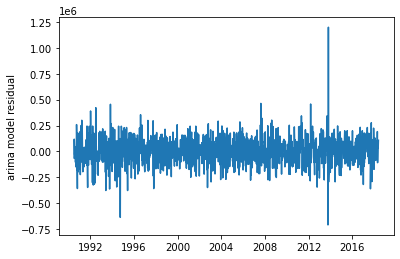

In [330]:
plt.plot(model_arima.resid)
plt.ylabel('arima model residual')
plt.show()

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.008163088144439992  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


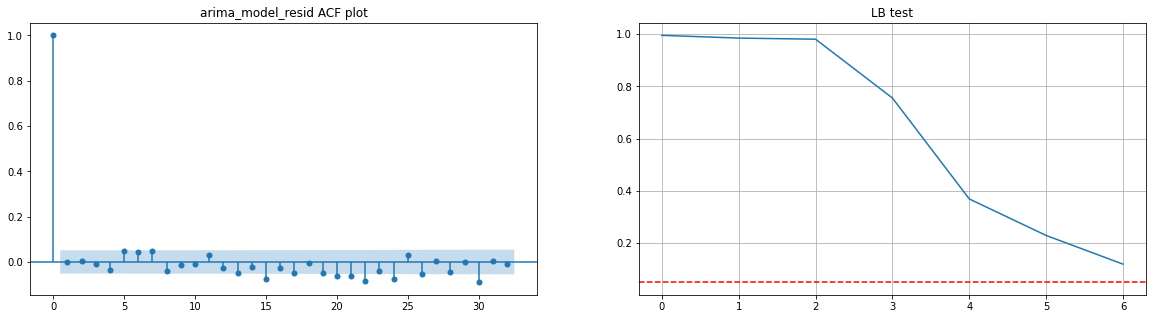

In [334]:
first_step(model_arima.resid,'arima_model_resid')

p value for ADF test:  2.1000572418231543e-30
p value for KPSS test:  0.1 

statistics for KPSS:  0.14249597090334493  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


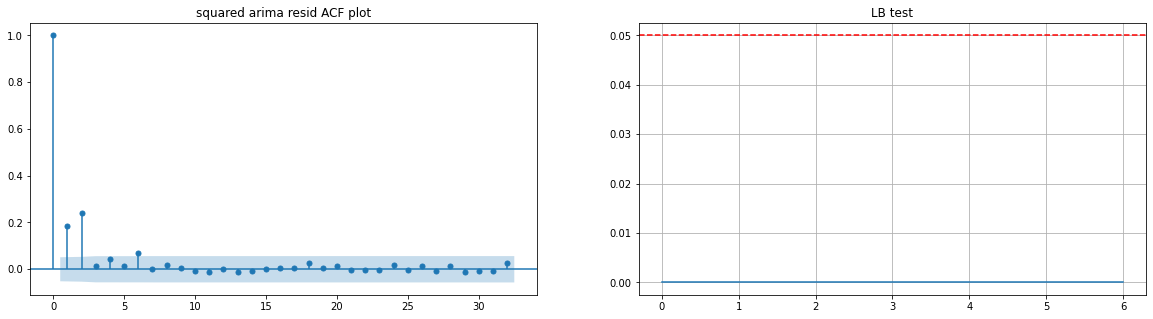

In [333]:
first_step(model_arima.resid**2,'squared arima resid')

In [282]:
model_garch = arch_model(model_arima.resid, vol='GARCH',p=1, q=1).fit()
model_garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21453.99247223366
Iteration:      2,   Func. Count:     13,   Neg. LLF: 19253.663411641595
Iteration:      3,   Func. Count:     19,   Neg. LLF: 19183.15488687782
Iteration:      4,   Func. Count:     25,   Neg. LLF: 19183.11354743378
Iteration:      5,   Func. Count:     30,   Neg. LLF: 19183.11354421352
Iteration:      6,   Func. Count:     34,   Neg. LLF: 19183.11354421353
Optimization terminated successfully    (Exit mode 0)
            Current function value: 19183.11354421352
            Iterations: 6
            Function evaluations: 34
            Gradient evaluations: 6


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.729e+10. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19183.1
Distribution:                  Normal   AIC:                           38374.2
Method:            Maximum Likelihood   BIC:                           38395.4
                                        No. Observations:                 1456
Date:                Sun, Nov 29 2020   Df Residuals:                     1452
Time:                        16:16:58   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            86.3832   3291.082  2.625e-02      0.979 [-6.364e+03,6.537e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7295e+09  7.765e+08      2.227  2.593e-02 [2.076e+08,3.251e+09]
alpha[1]       0.0882  3.212e-02      2.746  6.037e-03   [2.524e-02,  0.151]
beta[1]        0.8103  6.401e-02     12.659  9.994e-37     [  0.685,  0.936]
============================================================================

Covariance estimator: robust
"""

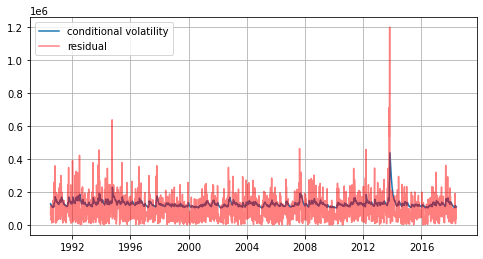

In [283]:
con_vol=model_garch.conditional_volatility

plt.figure(1, figsize=(8,4))
plt.plot(con_vol,label = 'conditional volatility')
plt.plot(abs(model_arima.resid), color = 'red', alpha = 0.5,label = 'residual')
plt.legend()
plt.grid()
plt.show()

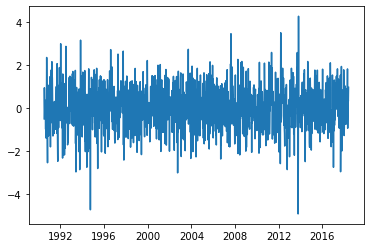

In [328]:
std_resid = model_garch.resid/con_vol
plt.plot(std_resid)

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.008163088144439959  criteria:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


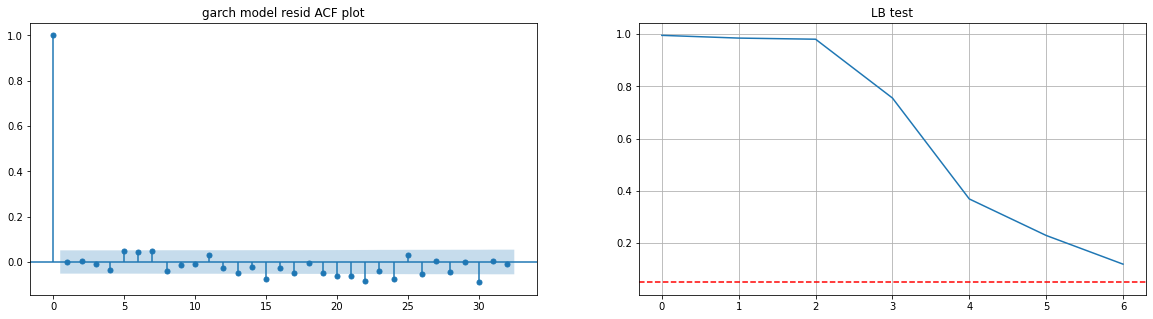

In [335]:
first_step(model_garch.resid,'garch model resid')

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


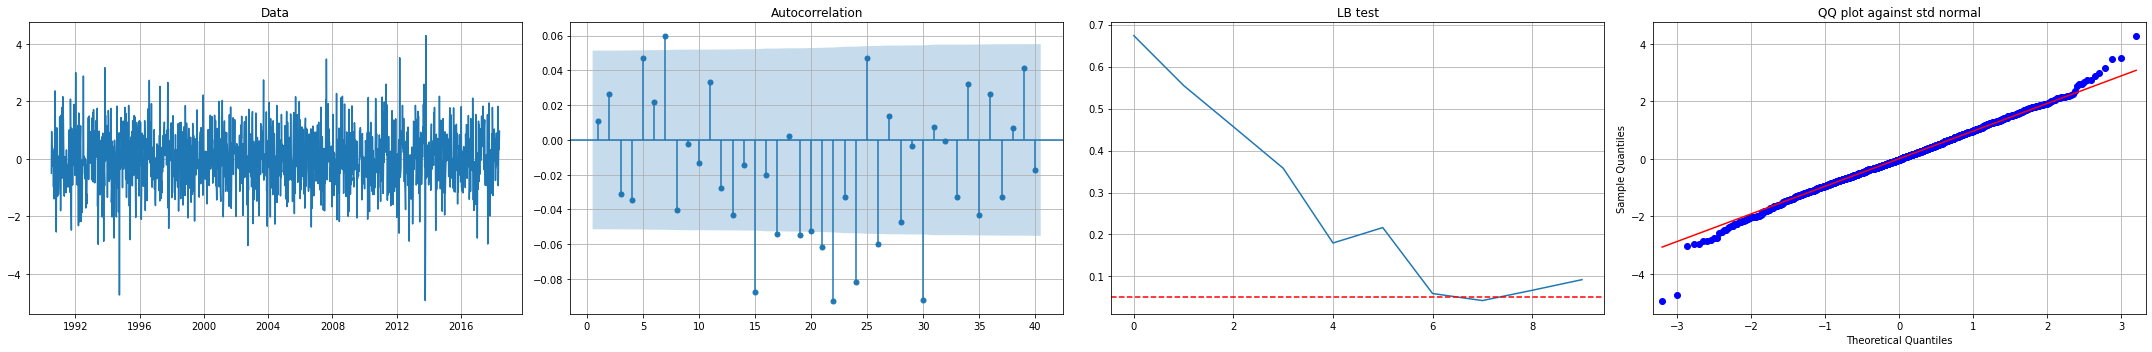

In [342]:
plot_diagnosticsTight3(std_resid)